In [2]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 0
rs = np.random.RandomState(SEED)

# Simulation setup

- Ref: Guo, H. K., Riles, K., Yang, F. W., & Zhao, Y. (2019). Searching for dark photon dark matter in LIGO O1 data. Communications Physics, 2(1). https://doi.org/10.1038/s42005-019-0255-0
    - Simulation is described in the 'Methods' section of the article.

- Velocity dispersion
$f(v) \sim v^2 e^{-v^2/v_0^2} $
    - $v_0 = 0.77 \times 10^{-3} c$

Text(0.5, 0, 'Speed**2 [$10^{-6}c^2$]')

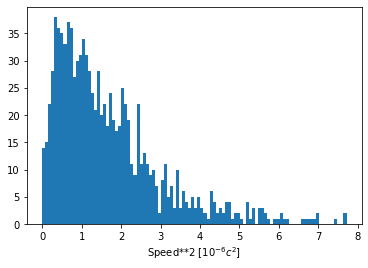

In [3]:
N_DP = 1000

v_0 = 0.77e-3
# 3-D gaussian
v_vec = rs.normal(loc=0, scale=v_0, size=(N_DP,3))
# velocity ^2
v2 = (v_vec**2).sum(axis=1)
# |vlocity|
v = np.sqrt(v2)

_ = plt.hist(v2*1e6, bins=100)
plt.xlabel(r'Speed**2 [$10^{-6}c^2$]')

In [4]:
# (V_x, V_y)
v_xy = np.sqrt((v_vec[:,:2]**2).sum(axis=1))
# V_z
v_z = v_vec[:,2]

In [8]:
def get_beta(v, v_xy, v_z):
    alpha = np.arctan(v_xy/v_z)
    sinbeta = np.sin(alpha) * v/np.sqrt(1+v**2)
    beta = np.arcsin(sinbeta)
    return beta
print(get_beta(v_0*np.sqrt(3.), v_0*np.sqrt(2.), v_0)*180./np.pi)
beta = get_beta(v, v_xy, v_z)

0.06239187755220373


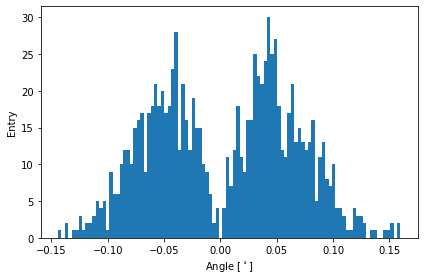

In [37]:
_ = plt.hist(beta*360/2/np.pi, bins=100)
plt.xlabel('Angle [$^\circ$]')
plt.ylabel('Entry')
plt.tight_layout()
plt.savefig('angle_dist.pdf')
plt.savefig('angle_dist.png', dpi=144)

(array([105.,  94.,  78., 104., 108., 106.,  94., 107.,  98., 106.]),
 array([0.01358504, 0.63972386, 1.26586268, 1.8920015 , 2.51814032,
        3.14427914, 3.77041796, 4.39655678, 5.0226956 , 5.64883442,
        6.27497324]),
 <a list of 10 Patch objects>)

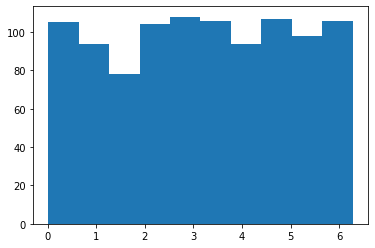

In [18]:
phi_pol = rs.uniform(0, 2*np.pi, size=N_DP)
cos_pol = rs.uniform(-1, 1, size=N_DP)
sin_pol = np.sqrt(1 - cos_pol**2)


In [ ]:
phi_pol = rs.uniform